## PAQUETES

In [1]:
import pandas as pd
import numpy as np

## DATOS

En primer lugar, abrimos los ficheros de entrenamiento que tenemos para ver nuestras variables. 

In [2]:
train_home_team_statistics_df = pd.read_csv('./TRAIN_DATA/train_home_team_statistics_df.csv', index_col=0)
train_away_team_statistics_df = pd.read_csv('./TRAIN_DATA/train_away_team_statistics_df.csv', index_col=0)

train_scores = pd.read_csv('./Y_train_1rknArQ.csv', index_col=0)

In [3]:
train_home_team_statistics_df.head()

,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,...,TEAM_YELLOWCARDS_5_last_match_std,TEAM_REDCARDS_5_last_match_std,TEAM_OFFSIDES_5_last_match_std,TEAM_ATTACKS_5_last_match_std,TEAM_PENALTIES_5_last_match_std,TEAM_SUBSTITUTIONS_5_last_match_std,TEAM_BALL_SAFE_5_last_match_std,TEAM_DANGEROUS_ATTACKS_5_last_match_std,TEAM_INJURIES_5_last_match_std,TEAM_GOALS_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,Ligue 1,Toulouse,3.0,2.0,5.0,2.0,1.0,2.0,2.0,5.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,Ligue 2,Brest,6.0,8.0,3.0,6.0,5.0,8.0,7.0,10.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,Serie A,Sampdoria,4.0,2.0,5.0,2.0,8.0,1.0,1.0,2.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,League One,Coventry City,7.0,5.0,5.0,6.0,6.0,9.0,9.0,2.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,NaN,6.0
4,Premier League,Wolverhampton Wanderers,3.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0


In [4]:
train_scores.head()

,HOME_WINS,DRAW,AWAY_WINS
ID,,,
0,0,0,1
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0


In [5]:
train_home_team_statistics_df["LEAGUE"].unique()

array(['Ligue 1', 'Ligue 2', 'Serie A', 'League One', 'Premier League',
       'Liga Portugal', 'La Liga', 'Superliga', 'Bundesliga',
       'Pro League', 'J-League', 'League Two', 'Eredivisie'], dtype=object)

Se puede observar que en las primeras columnas tenemos la liga y el equipo y en las otras tenemos distintas estadísticas. Vamos a seleccionar todas las variables a excepcion de la liga y el equipo para ver que estadísticas tenemos exactamente.

In [6]:
train_home = train_home_team_statistics_df.iloc[:,2:]

In [7]:
train_away = train_away_team_statistics_df.iloc[:,2:]

In [8]:
train_home.head()

,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,TEAM_FOULS_season_sum,...,TEAM_YELLOWCARDS_5_last_match_std,TEAM_REDCARDS_5_last_match_std,TEAM_OFFSIDES_5_last_match_std,TEAM_ATTACKS_5_last_match_std,TEAM_PENALTIES_5_last_match_std,TEAM_SUBSTITUTIONS_5_last_match_std,TEAM_BALL_SAFE_5_last_match_std,TEAM_DANGEROUS_ATTACKS_5_last_match_std,TEAM_INJURIES_5_last_match_std,TEAM_GOALS_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,3.0,2.0,5.0,2.0,1.0,2.0,2.0,5.0,3.0,6.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,6.0,8.0,3.0,6.0,5.0,8.0,7.0,10.0,6.0,8.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,4.0,2.0,5.0,2.0,8.0,1.0,1.0,2.0,2.0,7.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,7.0,5.0,5.0,6.0,6.0,9.0,9.0,2.0,2.0,0.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,NaN,6.0
4,3.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,4.0,7.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0


In [9]:
train_away.head()

,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,TEAM_FOULS_season_sum,...,TEAM_YELLOWCARDS_5_last_match_std,TEAM_REDCARDS_5_last_match_std,TEAM_OFFSIDES_5_last_match_std,TEAM_ATTACKS_5_last_match_std,TEAM_PENALTIES_5_last_match_std,TEAM_SUBSTITUTIONS_5_last_match_std,TEAM_BALL_SAFE_5_last_match_std,TEAM_DANGEROUS_ATTACKS_5_last_match_std,TEAM_INJURIES_5_last_match_std,TEAM_GOALS_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,4.0,1.0,4.0,1.0,5.0,4.0,3.0,6.0,4.0,6.0,...,5.0,5.0,4.0,0.0,6.0,8.0,4.0,3.0,2.0,3.0
1,4.0,3.0,4.0,3.0,8.0,8.0,7.0,8.0,5.0,8.0,...,0.0,0.0,3.0,1.0,8.0,4.0,10.0,0.0,5.0,3.0
2,4.0,3.0,4.0,2.0,6.0,4.0,4.0,1.0,6.0,8.0,...,6.0,10.0,4.0,4.0,0.0,8.0,3.0,0.0,9.0,6.0
3,0.0,0.0,0.0,0.0,1.0,3.0,3.0,8.0,1.0,3.0,...,0.0,0.0,1.0,2.0,0.0,5.0,6.0,3.0,NaN,2.0
4,5.0,4.0,5.0,6.0,5.0,6.0,6.0,4.0,5.0,5.0,...,1.0,0.0,4.0,4.0,9.0,4.0,1.0,4.0,6.0,5.0


In [10]:
for i, c in enumerate(train_home.columns):
    print(c)

TEAM_SHOTS_TOTAL_season_sum
TEAM_SHOTS_INSIDEBOX_season_sum
TEAM_SHOTS_OFF_TARGET_season_sum
TEAM_SHOTS_ON_TARGET_season_sum
TEAM_SHOTS_OUTSIDEBOX_season_sum
TEAM_PASSES_season_sum
TEAM_SUCCESSFUL_PASSES_season_sum
TEAM_SAVES_season_sum
TEAM_CORNERS_season_sum
TEAM_FOULS_season_sum
TEAM_YELLOWCARDS_season_sum
TEAM_REDCARDS_season_sum
TEAM_OFFSIDES_season_sum
TEAM_ATTACKS_season_sum
TEAM_PENALTIES_season_sum
TEAM_SUBSTITUTIONS_season_sum
TEAM_BALL_SAFE_season_sum
TEAM_DANGEROUS_ATTACKS_season_sum
TEAM_INJURIES_season_sum
TEAM_GOALS_season_sum
TEAM_GAME_WON_season_sum
TEAM_GAME_DRAW_season_sum
TEAM_GAME_LOST_season_sum
TEAM_SHOTS_TOTAL_season_average
TEAM_SHOTS_INSIDEBOX_season_average
TEAM_SHOTS_OFF_TARGET_season_average
TEAM_SHOTS_ON_TARGET_season_average
TEAM_SHOTS_OUTSIDEBOX_season_average
TEAM_PASSES_season_average
TEAM_SUCCESSFUL_PASSES_season_average
TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average
TEAM_SAVES_season_average
TEAM_CORNERS_season_average
TEAM_BALL_POSSESSION_season_a

Como vemos en realidad tenemos cerca de unas 22 variables diferentes y lo que cambia es si es de la temporada o de los ultimos 5 partidos y si es la suma, la media o la desviación típica de esas variables

A continuación, vamos a ver un poco más de información de los dataframes que tenemos

In [11]:
train_home.describe()

,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,TEAM_FOULS_season_sum,...,TEAM_YELLOWCARDS_5_last_match_std,TEAM_REDCARDS_5_last_match_std,TEAM_OFFSIDES_5_last_match_std,TEAM_ATTACKS_5_last_match_std,TEAM_PENALTIES_5_last_match_std,TEAM_SUBSTITUTIONS_5_last_match_std,TEAM_BALL_SAFE_5_last_match_std,TEAM_DANGEROUS_ATTACKS_5_last_match_std,TEAM_INJURIES_5_last_match_std,TEAM_GOALS_5_last_match_std
count,12043.000000,10918.000000,12303.000000,12301.000000,10916.000000,10890.000000,10919.000000,11523.000000,12302.000000,11546.000000,...,12302.000000,12240.000000,11297.000000,12303.000000,12290.000000,12212.000000,10508.000000,12303.000000,8985.000000,12301.000000
mean,4.391182,4.299872,4.511339,4.150882,4.524643,4.350597,4.130049,4.674043,4.505284,5.135718,...,3.959437,2.927859,3.590068,3.936276,3.559072,3.303144,3.797868,3.694302,3.865331,3.625559
std,2.871062,2.928012,2.806821,2.861291,2.845130,2.908079,2.900489,2.871876,2.802689,2.839771,...,2.850569,3.834186,2.830877,2.830410,3.673394,3.349802,2.866210,2.778135,2.792247,2.851149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,...,4.000000,0.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000,6.000000,7.000000,...,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,5.000000,6.000000,5.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Podemos observar así a simple vista y sin fijarnos en todas las columnas que en varias de ellas tenemos valores faltantes. Después ya decidiremos que hacer con esos valores faltantes. 

In [12]:
train_scores.describe()

,HOME_WINS,DRAW,AWAY_WINS
count,12303.000000,12303.000000,12303.000000
mean,0.435341,0.258961,0.305698
std,0.495822,0.438082,0.460721
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


En cuanto al dataframe de los resultados, observamos que el 44% son victorias, el 26% empates y el 30% derrotas. Viendo esto y sabiendo que lo más complicado de predecir son los empates nos planteamos dos posibilidades para más adelante. Crear un modelo que sea capaz de predecir todo o crear un modelo que prediga únicamente gana o pierde asumiendo el error de no saber predecir los empates.

### Correlación

A continuación, con la finalidad de reducir el número de variables que tenemos, vamos a calcular la correlación entre las variables. Ya que si dos variables están altamente correlacionadas, una de ellas puede ser redundante y no agregar información adicional al modelo. Como tenemos muchas variables, vamos a dividir los datos en funcion de si es durante la temporada o si es suma, media o desviación típica.

Primero miraremos sobre las variables de home_data y despues sobre away_data

#### Home_data

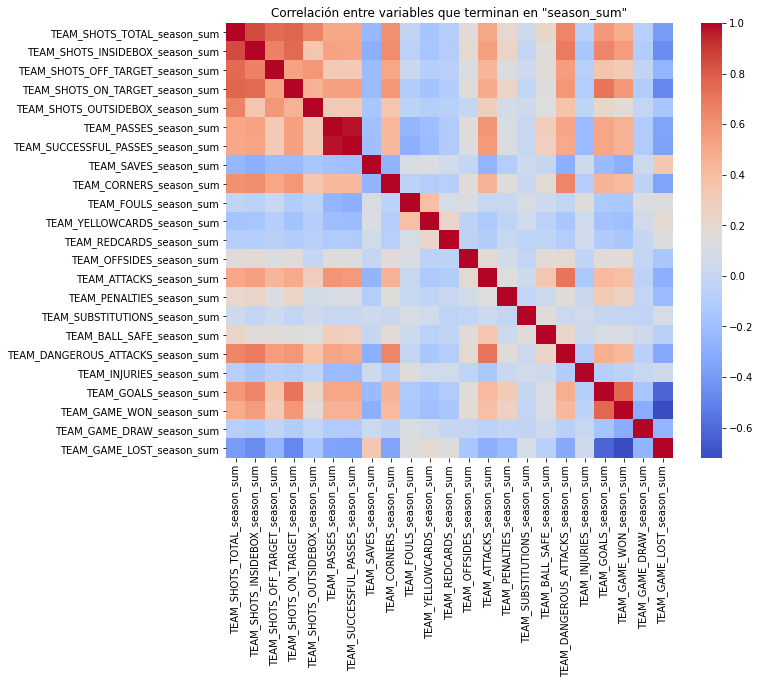

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

variables_season_sum = [col for col in train_home.columns if col.endswith('season_sum')]
df_season_sum = train_home[variables_season_sum]

# Calcular la matriz de correlación
correlation_matrix = df_season_sum.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables que terminan en "season_sum"')
plt.show()

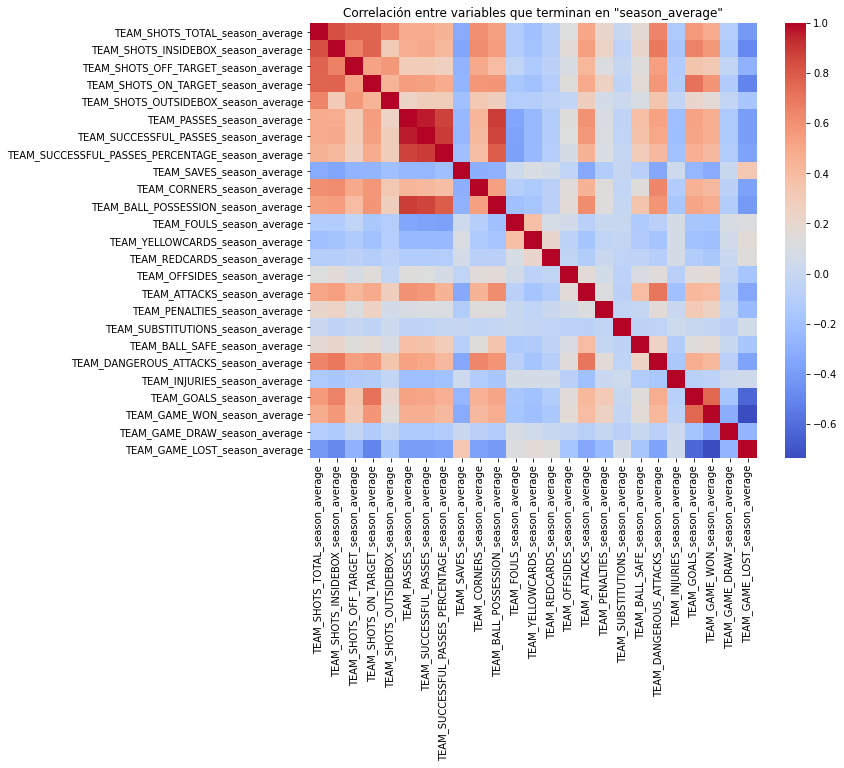

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

variables_season_sum = [col for col in train_home.columns if col.endswith('season_average')]
df_season_sum = train_home[variables_season_sum]

# Calcular la matriz de correlación
correlation_matrix = df_season_sum.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables que terminan en "season_average"')
plt.show()

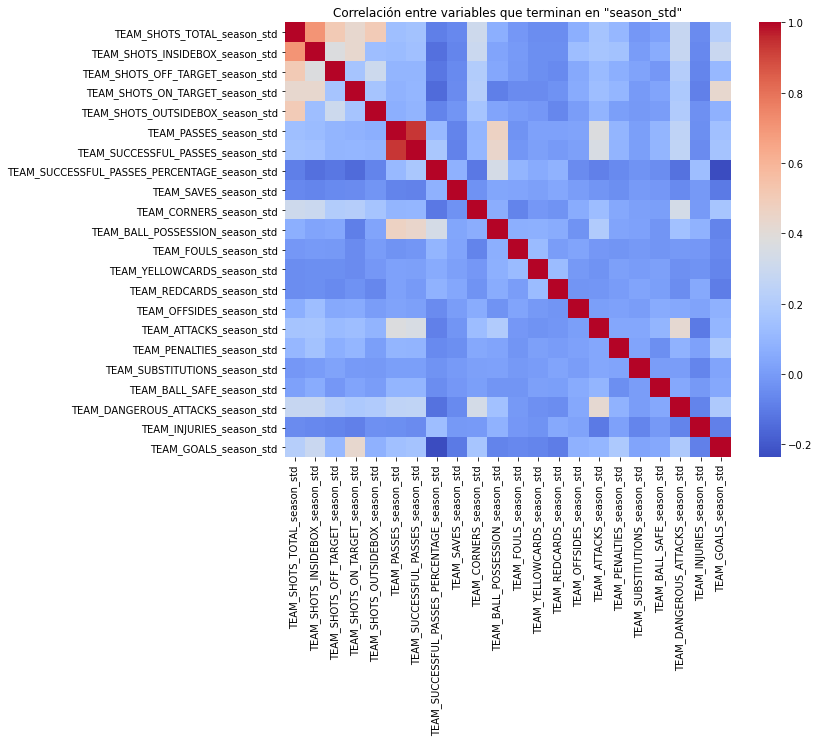

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

variables_season_sum = [col for col in train_home.columns if col.endswith('season_std')]
df_season_sum = train_home[variables_season_sum]

# Calcular la matriz de correlación
correlation_matrix = df_season_sum.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables que terminan en "season_std"')
plt.show()

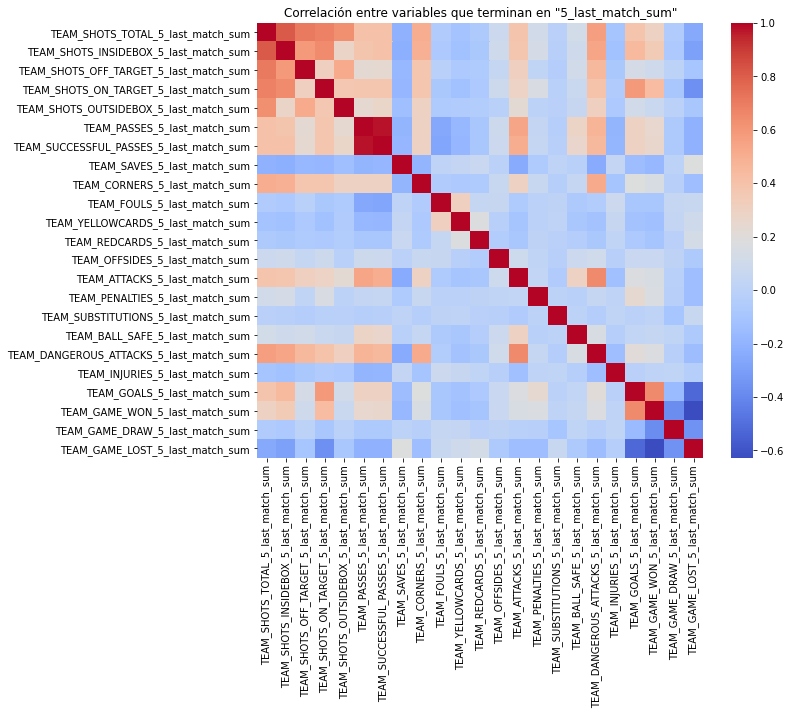

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

variables_season_sum = [col for col in train_home.columns if col.endswith('5_last_match_sum')]
df_season_sum = train_home[variables_season_sum]

# Calcular la matriz de correlación
correlation_matrix = df_season_sum.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables que terminan en "5_last_match_sum"')
plt.show()

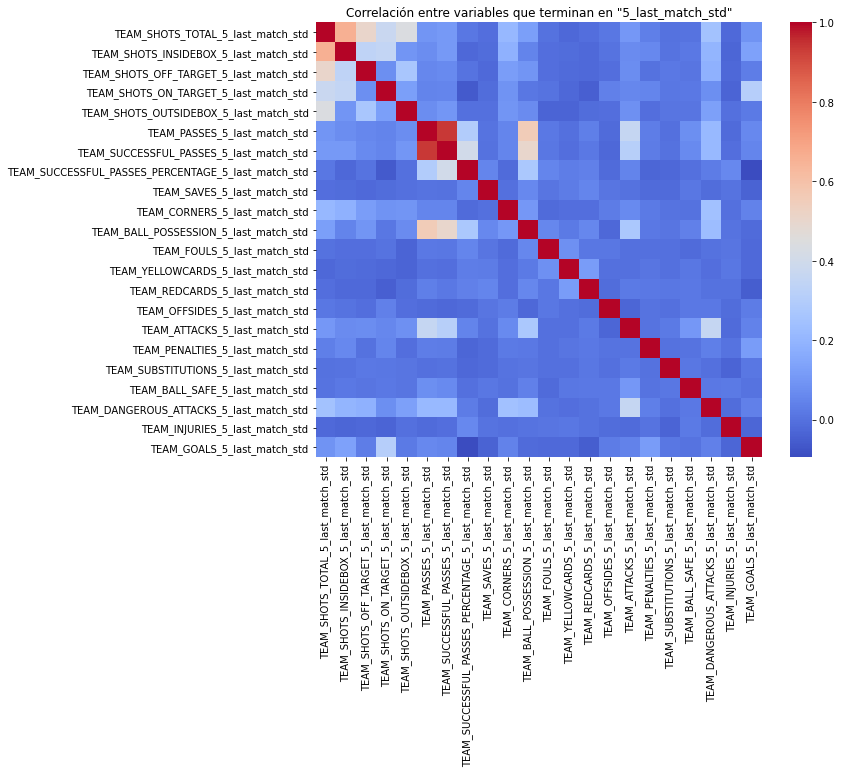

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

variables_season_sum = [col for col in train_home.columns if col.endswith('5_last_match_std')]
df_season_sum = train_home[variables_season_sum]

# Calcular la matriz de correlación
correlation_matrix = df_season_sum.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables que terminan en "5_last_match_std"')
plt.show()

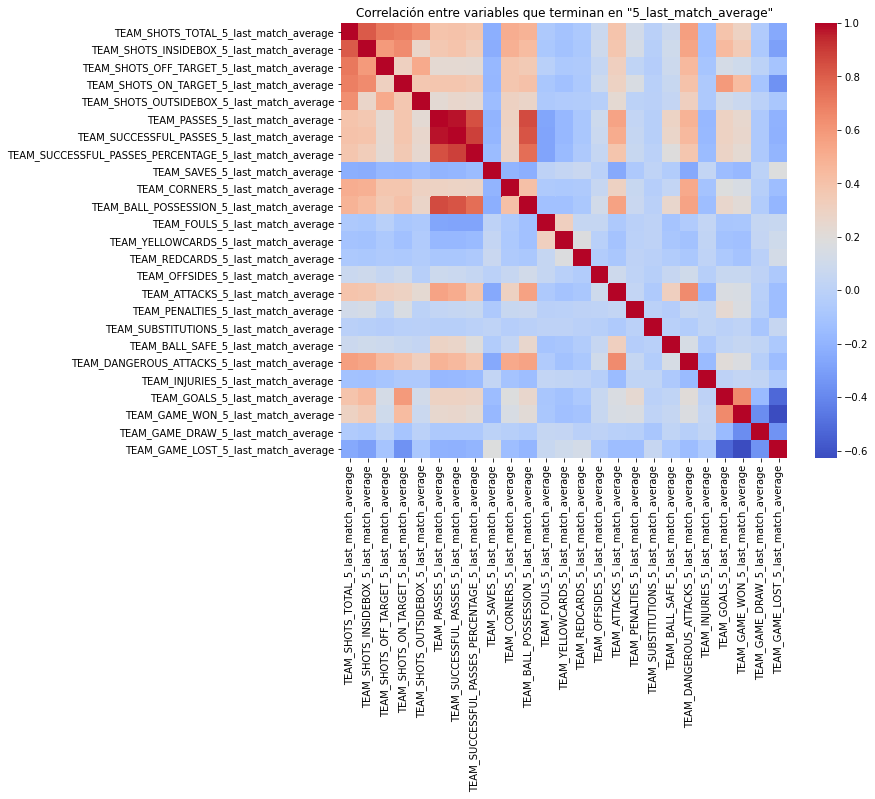

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

variables_season_sum = [col for col in train_home.columns if col.endswith('5_last_match_average')]
df_season_sum = train_home[variables_season_sum]

# Calcular la matriz de correlación
correlation_matrix = df_season_sum.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables que terminan en "5_last_match_average"')
plt.show()

#### Away_data

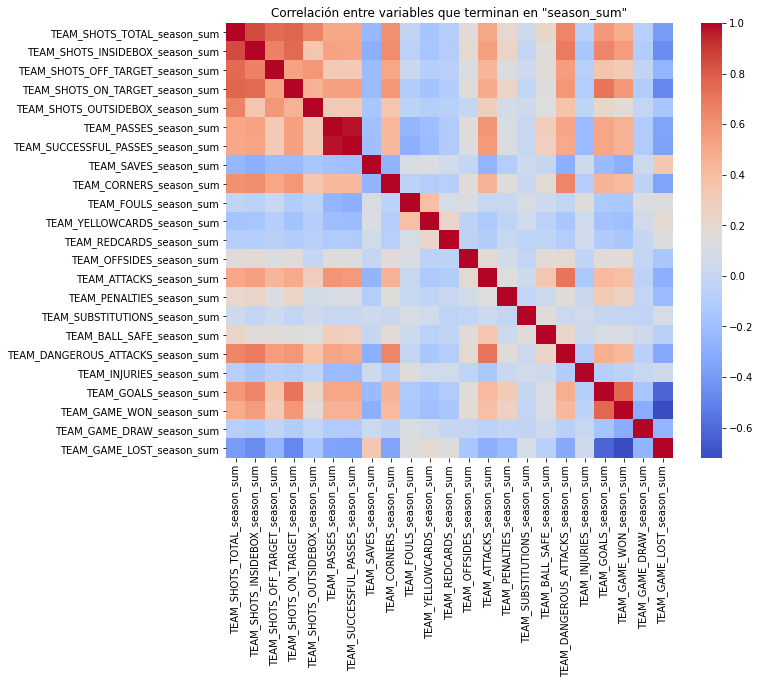

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

variables_season_sum = [col for col in train_away.columns if col.endswith('season_sum')]
df_season_sum = train_home[variables_season_sum]

# Calcular la matriz de correlación
correlation_matrix = df_season_sum.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables que terminan en "season_sum"')
plt.show()

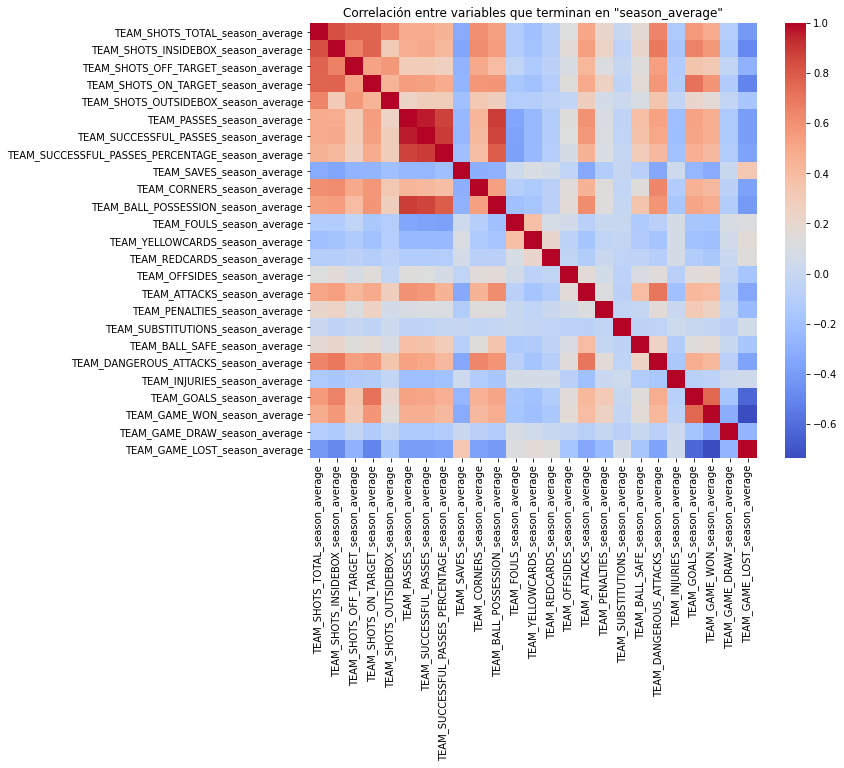

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

variables_season_sum = [col for col in train_away.columns if col.endswith('season_average')]
df_season_sum = train_home[variables_season_sum]

# Calcular la matriz de correlación
correlation_matrix = df_season_sum.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables que terminan en "season_average"')
plt.show()

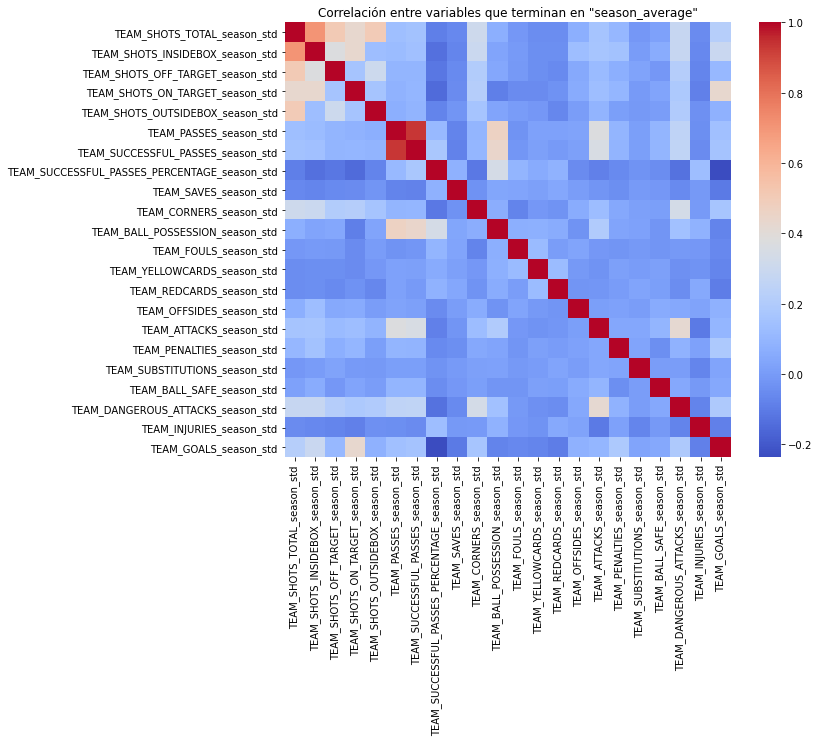

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

variables_season_sum = [col for col in train_away.columns if col.endswith('season_std')]
df_season_sum = train_home[variables_season_sum]

# Calcular la matriz de correlación
correlation_matrix = df_season_sum.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables que terminan en "season_average"')
plt.show()

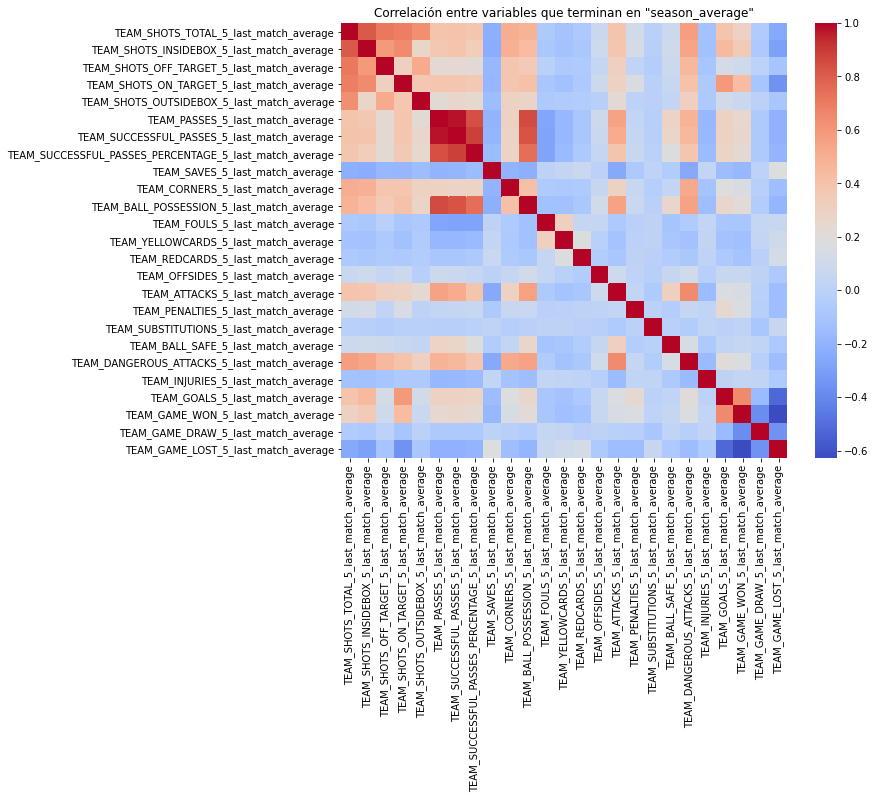

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

variables_season_sum = [col for col in train_away.columns if col.endswith('5_last_match_average')]
df_season_sum = train_home[variables_season_sum]

# Calcular la matriz de correlación
correlation_matrix = df_season_sum.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables que terminan en "season_average"')
plt.show()

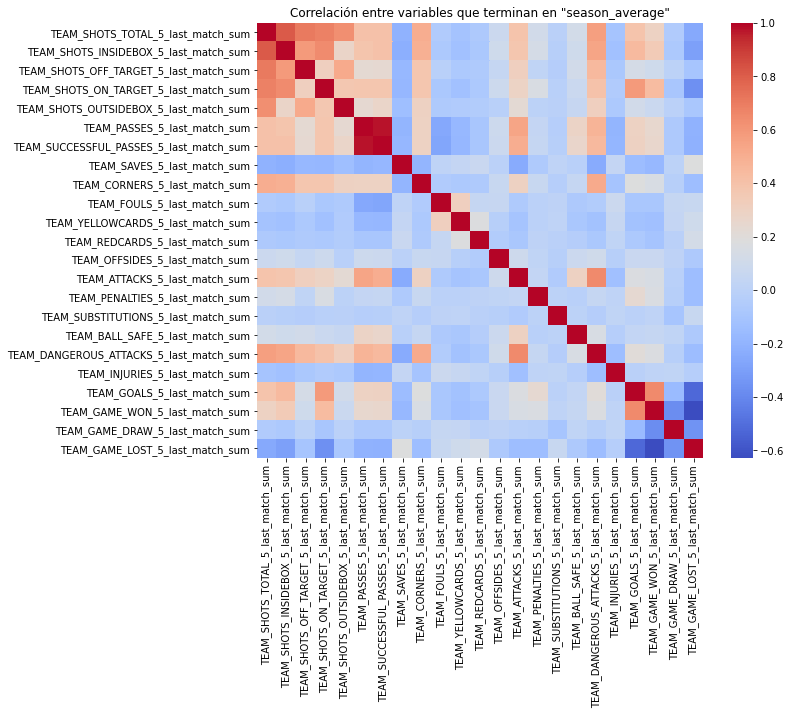

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

variables_season_sum = [col for col in train_away.columns if col.endswith('5_last_match_sum')]
df_season_sum = train_home[variables_season_sum]

# Calcular la matriz de correlación
correlation_matrix = df_season_sum.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables que terminan en "season_average"')
plt.show()

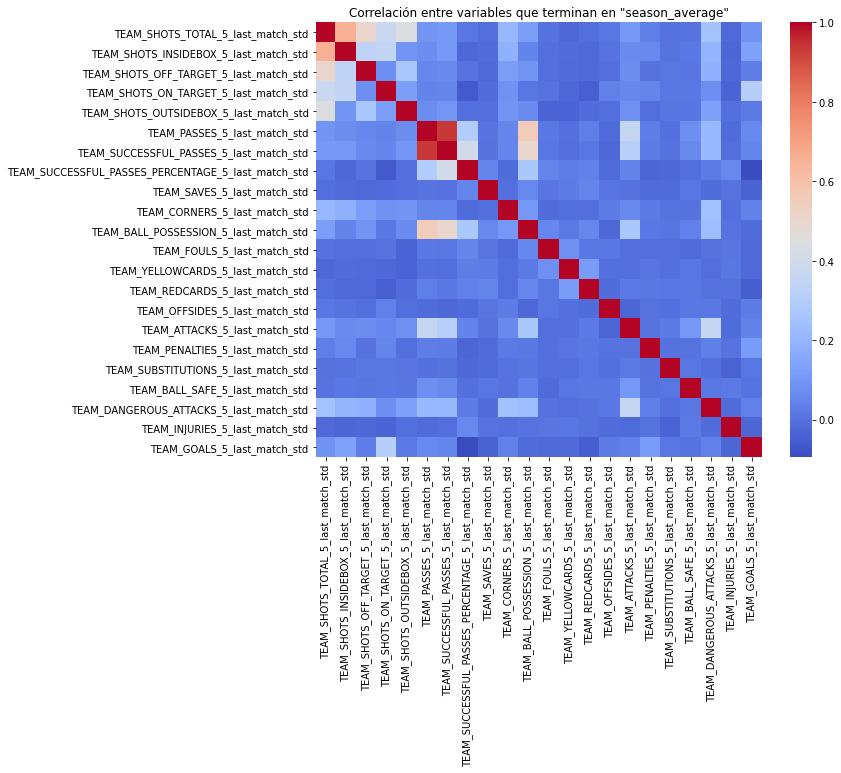

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

variables_season_sum = [col for col in train_away.columns if col.endswith('5_last_match_std')]
df_season_sum = train_home[variables_season_sum]

# Calcular la matriz de correlación
correlation_matrix = df_season_sum.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables que terminan en "season_average"')
plt.show()

Como se puede observar tanto en el dataframe de home como en el de away las variables team_passes and team_successful_passes están muy correlaciones por lo que vamos a eliminar de nuestros dataframes la variable team_successful_passes.

In [13]:
columns_to_remove = [
    'TEAM_SUCCESSFUL_PASSES_season_std',
    'TEAM_SUCCESSFUL_PASSES_season_sum',
    'TEAM_SUCCESSFUL_PASSES_5_last_match_average',
    'TEAM_SUCCESSFUL_PASSES_5_last_match_std',
    'TEAM_SUCCESSFUL_PASSES_season_average',
    'TEAM_SUCCESSFUL_PASSES_5_last_match_sum'
]

train_home = train_home.drop(columns=columns_to_remove)
train_away = train_away.drop(columns=columns_to_remove)

### Valores faltantes

A continuación, vamos a unir las columnas de los dfs de home y away y vamos a tratar los datos faltantes

In [14]:
train_home.columns = 'HOME_' + train_home.columns # We do this so that we can combine the data sets into one for training
train_away.columns = 'AWAY_' + train_away.columns

train_data =  pd.concat([train_home,train_away],join='inner',axis=1) # Join together

In [15]:
train_data

,HOME_TEAM_SHOTS_TOTAL_season_sum,HOME_TEAM_SHOTS_INSIDEBOX_season_sum,HOME_TEAM_SHOTS_OFF_TARGET_season_sum,HOME_TEAM_SHOTS_ON_TARGET_season_sum,HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum,HOME_TEAM_PASSES_season_sum,HOME_TEAM_SAVES_season_sum,HOME_TEAM_CORNERS_season_sum,HOME_TEAM_FOULS_season_sum,HOME_TEAM_YELLOWCARDS_season_sum,...,AWAY_TEAM_YELLOWCARDS_5_last_match_std,AWAY_TEAM_REDCARDS_5_last_match_std,AWAY_TEAM_OFFSIDES_5_last_match_std,AWAY_TEAM_ATTACKS_5_last_match_std,AWAY_TEAM_PENALTIES_5_last_match_std,AWAY_TEAM_SUBSTITUTIONS_5_last_match_std,AWAY_TEAM_BALL_SAFE_5_last_match_std,AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std,AWAY_TEAM_INJURIES_5_last_match_std,AWAY_TEAM_GOALS_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,3.0,2.0,5.0,2.0,1.0,2.0,5.0,3.0,6.0,2.0,...,5.0,5.0,4.0,0.0,6.0,8.0,4.0,3.0,2.0,3.0
1,6.0,8.0,3.0,6.0,5.0,8.0,10.0,6.0,8.0,3.0,...,0.0,0.0,3.0,1.0,8.0,4.0,10.0,0.0,5.0,3.0
2,4.0,2.0,5.0,2.0,8.0,1.0,2.0,2.0,7.0,7.0,...,6.0,10.0,4.0,4.0,0.0,8.0,3.0,0.0,9.0,6.0
3,7.0,5.0,5.0,6.0,6.0,9.0,2.0,2.0,0.0,0.0,...,0.0,0.0,1.0,2.0,0.0,5.0,6.0,3.0,NaN,2.0
4,3.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,7.0,4.0,...,1.0,0.0,4.0,4.0,9.0,4.0,1.0,4.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12298,4.0,2.0,3.0,4.0,7.0,4.0,3.0,2.0,2.0,4.0,...,5.0,5.0,0.0,1.0,6.0,10.0,1.0,1.0,NaN,2.0
12299,4.0,2.0,3.0,1.0,5.0,1.0,9.0,1.0,10.0,10.0,...,7.0,5.0,2.0,2.0,0.0,0.0,1.0,6.0,9.0,1.0
12300,4.0,3.0,5.0,3.0,5.0,1.0,6.0,1.0,8.0,10.0,...,8.0,0.0,3.0,2.0,0.0,0.0,6.0,3.0,4.0,4.0


Lo primero que hacemos es mirar las columnas con mas valores faltantes

In [16]:
missing_percentages = train_data.isna().mean() * 100

missing_percentages_sorted = missing_percentages.sort_values(ascending=False)

top_missing = missing_percentages_sorted.head(10)  # Muestra las top 10 columnas

# Imprimir el resultado
print(top_missing.to_string())

HOME_TEAM_INJURIES_5_last_match_std        26.969032
AWAY_TEAM_INJURIES_5_last_match_std        26.928391
AWAY_TEAM_INJURIES_5_last_match_sum        23.839714
HOME_TEAM_INJURIES_5_last_match_sum        23.831586
AWAY_TEAM_INJURIES_5_last_match_average    23.831586
HOME_TEAM_INJURIES_5_last_match_average    23.823458
AWAY_TEAM_INJURIES_season_std              23.782817
HOME_TEAM_INJURIES_season_std              23.766561
AWAY_TEAM_INJURIES_season_sum              15.939202
HOME_TEAM_INJURIES_season_sum              15.931074


Como se observa hay columnas que soprepasan el 20% de valores faltantes, pero antes de eliminarlas, vamos a estudiar los faltantes por filas

In [17]:
missing_percentages_rows = train_data.isna().mean(axis=1) * 100

missing_percentages_rows_sorted = missing_percentages_rows.sort_values(ascending=False)

missing_percentages_rows_sorted

ID
5646     53.731343
10163    53.731343
4624     41.791045
8538     41.044776
835      41.044776
           ...    
4907      0.000000
4908      0.000000
4909      0.000000
4911      0.000000
12302     0.000000
Length: 12303, dtype: float64

Hemos decidio eliminar todas aquellas filas con un mas del 25% de faltantes ya que es una cantidad bastante alta

In [18]:
indices_a_eliminar = missing_percentages_rows_sorted[missing_percentages_rows_sorted > 25].index

# Luego, eliminas estas filas del DataFrame
train_data = train_data.drop(indices_a_eliminar)

Ahora mirando los valores faltantes por columna, vemos que todas tienen un 20% o menos por lo que las intentaremos predecir con la librería mice.

In [19]:
missing_percentages = train_data.isna().mean() * 100

# Ordenar las columnas por porcentaje de valores faltantes de mayor a menor
missing_percentages_sorted = missing_percentages.sort_values(ascending=False)

# Opcional: Seleccionar el número de columnas con más valores faltantes que quieres mostrar
top_missing = missing_percentages_sorted.head(10)  # Muestra las top 10 columnas

# Imprimir el resultado
print(top_missing.to_string())

HOME_TEAM_INJURIES_5_last_match_std        20.798801
AWAY_TEAM_INJURIES_5_last_match_std        20.763534
AWAY_TEAM_INJURIES_5_last_match_sum        17.933345
AWAY_TEAM_INJURIES_5_last_match_average    17.924528
HOME_TEAM_INJURIES_5_last_match_sum        17.871628
HOME_TEAM_INJURIES_5_last_match_average    17.862811
HOME_TEAM_INJURIES_season_std              17.818727
AWAY_TEAM_INJURIES_season_std              17.818727
AWAY_TEAM_BALL_SAFE_5_last_match_std       14.547699
HOME_TEAM_BALL_SAFE_5_last_match_std       14.380180


Guardamos este fichero para utilizarlo en rstudio para utilizar alli la librería mice.

In [ ]:
train_data.to_csv("train_data_filtrados.csv", sep=';', index = False)